In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [2]:
RUN_ID = '0027'
RUN_FOLDER = os.path.join("./run", RUN_ID)
DATA_FOLDER = './data/celeb/'

BATCH_SIZE = 64
IMAGE_SIZE = 64

In [3]:
data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32') - 127.5) / 127.5)

x_train = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = (IMAGE_SIZE,IMAGE_SIZE)
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )

Found 202599 images belonging to 1 classes.


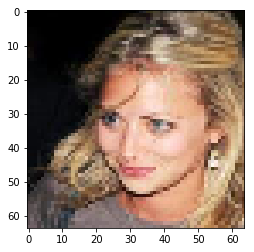

In [4]:
plt.imshow((x_train[0][0][0]+1)/2)

In [9]:

r, c = 5, 5

idx = np.random.randint(0, x_train[0][0].shape[0], BATCH_SIZE)
true_imgs = (x_train[0][0][idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()


In [5]:
#works

gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [18]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        print(i,',',j)
#         for l in x_train:
#             print(l.shape)
        for k_idx, k in enumerate((x_train[0][0] + 1) * 0.5):
#                 print(k.shape)

            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()

0 , 0
0 , 1
0 , 2
0 , 3
0 , 4
1 , 0
1 , 1
1 , 2
1 , 3
1 , 4
2 , 0
2 , 1
2 , 2
2 , 3
2 , 4
3 , 0
3 , 1
3 , 2
3 , 3
3 , 4
4 , 0
4 , 1
4 , 2
4 , 3
4 , 4


In [17]:
len(x_train[0])

TypeError: '>=' not supported between instances of 'slice' and 'int'